In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import pictorial
schemdraw.use('svg')
#schemdraw.svgconfig.text = 'path'

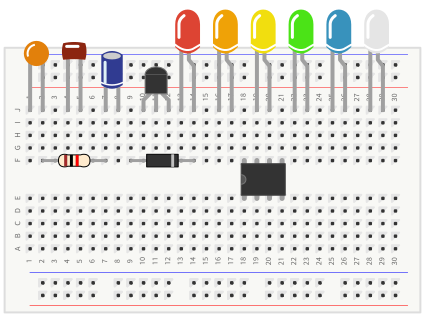

In [2]:
# All the built-in pictorial elements
with schemdraw.Drawing() as d:
    bb = pictorial.Breadboard().up()
    pictorial.CapacitorCeramic().at(bb.J1)
    pictorial.CapacitorMylar().at(bb.J4)
    pictorial.CapacitorElectrolytic().at(bb.J7)
    pictorial.TO92().at(bb.J10)
    pictorial.LED().at(bb.J13)
    pictorial.LEDOrange().at(bb.J16)
    pictorial.LEDYellow().at(bb.J19)
    pictorial.LEDGreen().at(bb.J22)
    pictorial.LEDBlue().at(bb.J25)
    pictorial.LEDWhite().at(bb.J28)
    pictorial.Diode().at(bb.F9).to(bb.F14)
    pictorial.Resistor().at(bb.F2).to(bb.F7)
    pictorial.DIP(n=8).at(bb.E18).up()


In [3]:
pictorial.Resistor(100)

In [4]:
pictorial.Resistor(330)

In [5]:
pictorial.Resistor(10000)

In [6]:
pictorial.Resistor(5200)

In [7]:
pictorial.Resistor(1000000)

In [8]:
pictorial.Resistor(tolerance=5)

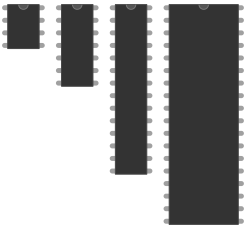

In [9]:
with schemdraw.Drawing():
    pictorial.DIP()
    pictorial.DIP(npins=14).at((1.5,0))
    pictorial.DIP(npins=28).at((3,0))
    pictorial.DIP(npins=36, wide=True).at((4.5, 0))

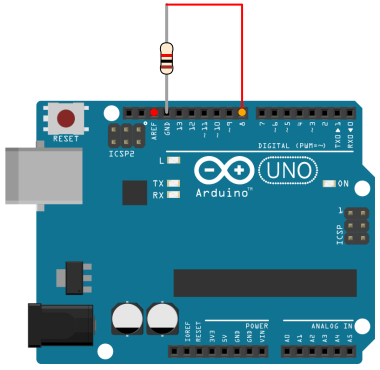

In [10]:
class ArduinoBoard(elm.ElementImage):
    def __init__(self):
        width = 10.3
        height = width/1.397
        super().__init__('../docs/ArduinoUNO.png', width=width, height=height, xy=(-.75, 0))
        top = height * .956
        arefx = 3.4
        pinspace = pictorial.PINSPACING
        for i, pinname in enumerate(['aref', 'gnd', 'pin13', 'pin12', 'pin11',
                                     'pin10', 'pin9', 'pin8']):
            self.anchors[pinname] = (arefx + i*pinspace, top)

with schemdraw.Drawing():
    ard = ArduinoBoard()
    elm.Dot().at(ard.aref).color('red')
    elm.Dot().at(ard.pin8).color('orange')
    r = pictorial.Resistor().at(ard.gnd).up()
    elm.Wire('-|').at(r.end).to(ard.pin8).color('red')

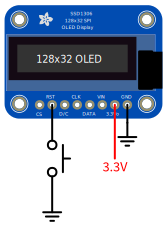

In [11]:
from urllib.request import urlretrieve
part = 'https://github.com/adafruit/Fritzing-Library/raw/master/parts/Adafruit%20OLED%20Monochrome%20128x32%20SPI.fzpz'
fname, msg = urlretrieve(part)
with schemdraw.Drawing() as d:
    f = pictorial.FritzingPart(fname).at((3,3))
    elm.Line().down().at(f.GND).length(.5)
    elm.Ground()
    elm.Line().down().at(f.absanchors['3.3V']).color('red').length(1.5).label('3.3V', loc='left')
    elm.Button().at(f.RESET)
    elm.Ground(lead=False)

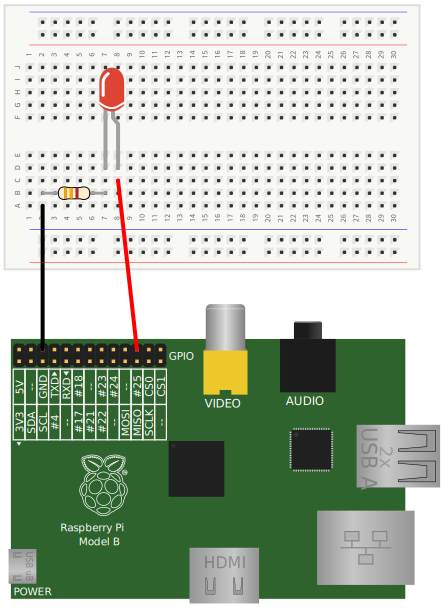

In [12]:
from urllib.request import urlretrieve
part = 'https://github.com/adafruit/Fritzing-Library/raw/master/parts/Raspberry%20Pi%20Model%20B.fzpz'
fname, msg = urlretrieve(part)

with schemdraw.Drawing() as d:
    d.config(lw=4)
    rpi = pictorial.FritzingPart(fname)
    elm.Line().up().at(rpi.GND).length(4)
    bb = pictorial.Breadboard().anchor('A2')    
    pictorial.Resistor(330).at(bb.B2).to(bb.B7)
    pictorial.LED().at(bb.D7)
    elm.Line().at(bb.C8).to(rpi.anchors['#25']).color('red')

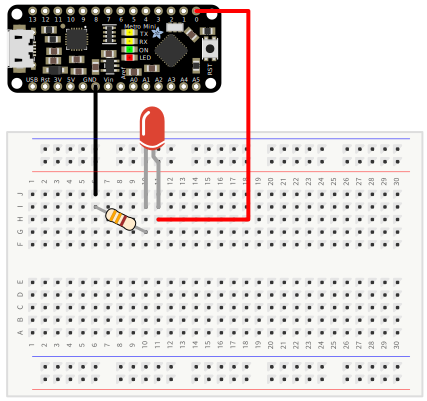

In [13]:
part = 'https://github.com/adafruit/Fritzing-Library/raw/master/Adafruit%20Arduino.fzbz'
fname, msg = urlretrieve(part)
with schemdraw.Drawing() as d:
    d.config(lw=4)
    mm = pictorial.FritzingPart(fname, partname='Adafruit Metro Mini')
    elm.Line().at(mm.GND).down()
    bb = pictorial.Breadboard().up().anchor('J6')
    pictorial.Resistor(330).at(bb.I6).to(bb.G10)
    pictorial.LED().at(bb.I10)
    elm.Wire('c', k=2.5).at(bb.H11).to(mm.IO0).color('red')

In [14]:
import glob

In [15]:
def testpart(fzpz):
    with schemdraw.Drawing() as d:
        print(fzpz)
        part = pictorial.FritzingPart(fzpz)
        for anchor in part.anchors.keys():
            elm.Dot().at(part.absanchors[anchor]).color('orange')

In [16]:
# Clone https://github.com/adafruit/Fritzing-Library to test a bunch of parts
# and verify anchor positions

#parts = glob.glob('./Fritzing-Library/parts/*.fzpz')
#for part in parts:
#    testpart(part)